In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import  LinearSVC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
plt.rc("font", size=12)

In [2]:
train_df = pd.read_csv('train.csv')
test_df= pd.read_csv('test.csv')

In [3]:
train_df.sample(10)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
111845,train_111845,0,17.4829,-5.3929,6.9000,6.2764,9.9509,-7.6191,6.6801,21.3597,...,6.0705,2.0740,3.6379,8.7521,22.4681,-1.4799,-0.2291,8.0512,20.8256,-8.6667
44065,train_44065,0,9.2982,-4.8352,14.8197,5.9480,10.1968,0.0479,5.0493,16.1108,...,7.7120,6.9996,2.2429,2.8176,17.1376,-0.5637,-5.7604,8.3301,16.1756,13.0736
60054,train_60054,0,13.7577,-0.4612,10.3289,3.2353,10.9071,2.7957,4.3930,21.5168,...,1.6732,8.3574,2.7460,6.3703,19.4633,-2.4546,6.4931,9.7574,17.1492,6.0933
182350,train_182350,0,6.0557,-0.0222,11.2288,6.9422,10.7305,-5.6775,5.5877,17.2361,...,2.8625,11.4869,0.8470,3.0741,14.6745,0.5210,6.5610,8.2435,11.2029,1.0866
9349,train_9349,0,9.9706,1.8420,11.0205,9.3701,12.1146,1.0485,4.7730,11.9062,...,-2.6692,5.8387,2.6721,-1.8913,17.3645,-1.7555,-2.3842,9.5177,18.2476,-7.4108
198331,train_198331,0,11.3064,-0.0883,10.6110,6.6877,11.4308,-9.7212,4.7958,11.5121,...,-0.1139,13.4968,2.6199,-3.9992,16.4009,-0.7396,10.2725,8.6496,15.2219,1.1956
57843,train_57843,0,8.9563,-0.2246,7.5056,6.1646,11.6759,-17.0443,5.1398,13.3479,...,14.2804,8.7379,0.0978,3.6593,22.7931,-0.4584,5.5918,9.0572,17.6165,-9.5189
121385,train_121385,0,10.9362,-2.7372,7.9658,9.0000,13.2267,-5.8113,5.1698,17.1199,...,0.4949,5.3580,2.8356,1.6448,18.6871,0.7487,5.6348,9.7790,11.6056,12.6740
82510,train_82510,0,7.2506,-0.7139,11.9844,6.8728,10.8123,-0.3445,5.2615,18.0981,...,6.7051,3.0009,4.8960,-3.4712,15.2361,-0.9945,10.3757,9.7390,14.8886,13.8488
57021,train_57021,0,11.7443,-1.6499,8.6835,3.4635,10.3136,3.4713,6.3809,18.9509,...,2.6076,9.9541,2.3066,8.9794,14.7872,-2.1851,2.9859,10.6535,16.7460,-8.5299


In [4]:
test_df.sample(10)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
6615,test_6615,14.3374,7.1878,12.6484,8.0881,12.2588,-13.8167,5.3485,16.4204,-0.1338,...,-5.6750,8.8598,1.3894,1.9315,15.3459,-1.2356,11.9490,9.4723,18.5611,-11.6870
162094,test_162094,9.2074,0.4556,8.7377,6.7458,11.5275,2.8339,3.9770,15.6584,-4.7654,...,6.9228,11.8765,3.5918,-0.5136,15.6558,1.9557,3.7758,9.9949,20.1888,19.6494
188754,test_188754,9.1554,-1.9309,12.6205,7.0981,13.0119,3.2102,4.9783,17.0448,-1.6320,...,2.9723,1.2706,0.4232,1.5978,17.0703,-1.1603,4.1418,10.3554,13.3042,-1.1747
47860,test_47860,14.0997,-3.3592,13.9298,7.9836,13.8723,7.0438,4.7717,11.2423,-7.6687,...,8.9583,8.5470,3.1981,1.6149,22.0671,0.9210,8.3716,6.8356,16.4463,-0.5903
139794,test_139794,12.9103,-3.3356,10.5497,6.0201,11.4787,-16.2326,6.4879,15.2500,2.8515,...,11.9599,13.4994,2.6929,3.1685,20.1494,1.0104,3.3149,8.6781,14.5476,-15.2556
155181,test_155181,15.1818,3.4514,10.3366,4.6980,11.6906,-3.4953,6.1826,19.8729,2.2017,...,8.1360,10.7034,7.2581,8.7339,15.4049,1.1803,7.7865,8.9747,16.6903,-22.1473
170295,test_170295,10.5086,-3.1019,8.2863,7.9169,11.8013,-8.3423,4.8103,12.9016,-3.7495,...,6.5416,7.9460,1.1574,5.1917,23.2491,0.3221,0.1669,8.6386,14.1890,4.2823
25178,test_25178,12.1760,-1.0027,9.8001,7.1485,9.1494,1.0754,5.5567,22.0155,-0.1836,...,2.3735,4.3221,-0.8973,1.7864,21.4536,-1.5346,-2.0608,8.5447,13.8404,-5.7360
133448,test_133448,8.7818,1.3907,5.7401,8.5846,10.2287,-7.1912,4.5164,16.9350,1.9094,...,-0.1759,2.4651,2.3699,1.3715,19.1146,-1.9903,-2.3090,10.1360,15.0856,-7.8004
64507,test_64507,10.3809,0.4241,9.7692,7.3095,8.1206,-9.1438,6.7818,10.5846,-6.4522,...,2.5508,10.8050,-0.0594,-3.0805,16.6139,1.5001,6.9494,7.5838,18.2555,10.1318


In [5]:
train_df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [6]:
test_df.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


In [7]:
X = train_df.iloc[:,2:202]
y = train_df.iloc[:,1]

### EDA

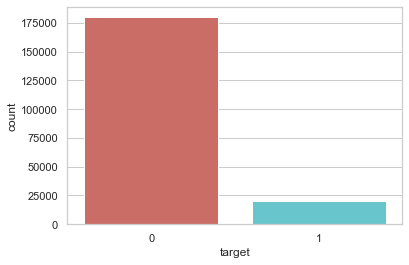

In [8]:
sns.countplot(x='target',data=train_df, palette='hls')
plt.show()

C:\Users\shind\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shind\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


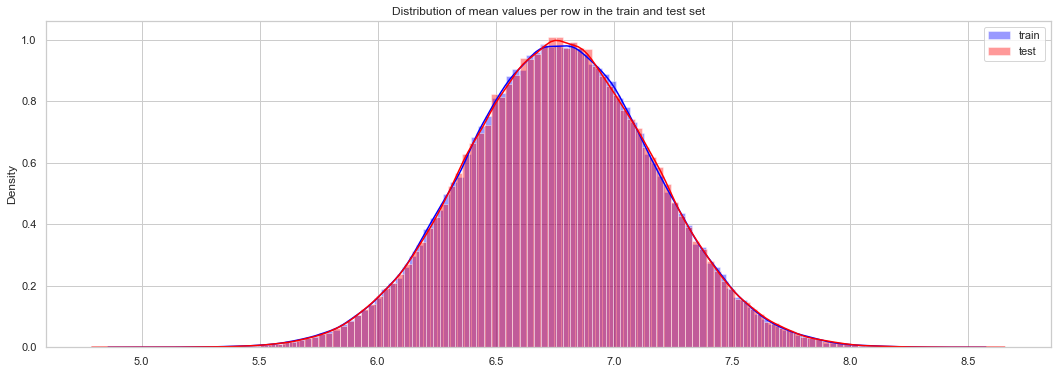

In [9]:
plt.figure(figsize=(18,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(train_df[features].mean(axis=1),color="blue", kde=True,bins=120, label='train')
sns.distplot(test_df[features].mean(axis=1),color="red", kde=True,bins=120, label='test')
plt.legend()
plt.show()

C:\Users\shind\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shind\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


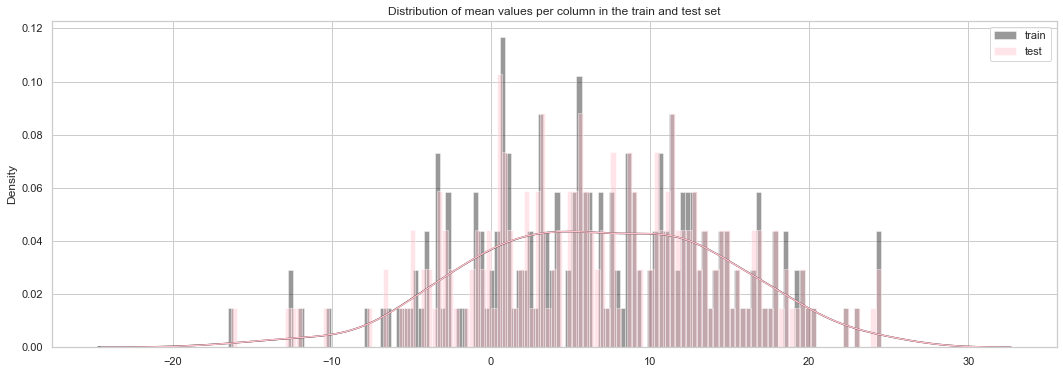

In [10]:
plt.figure(figsize=(18,6))
plt.title("Distribution of mean values per column in the train and test set")
sns.distplot(train_df[features].mean(axis=0),color="black",kde=True,bins=120, label='train')
sns.distplot(test_df[features].mean(axis=0),color="pink", kde=True,bins=120, label='test')
plt.legend()
plt.show()

<AxesSubplot:>

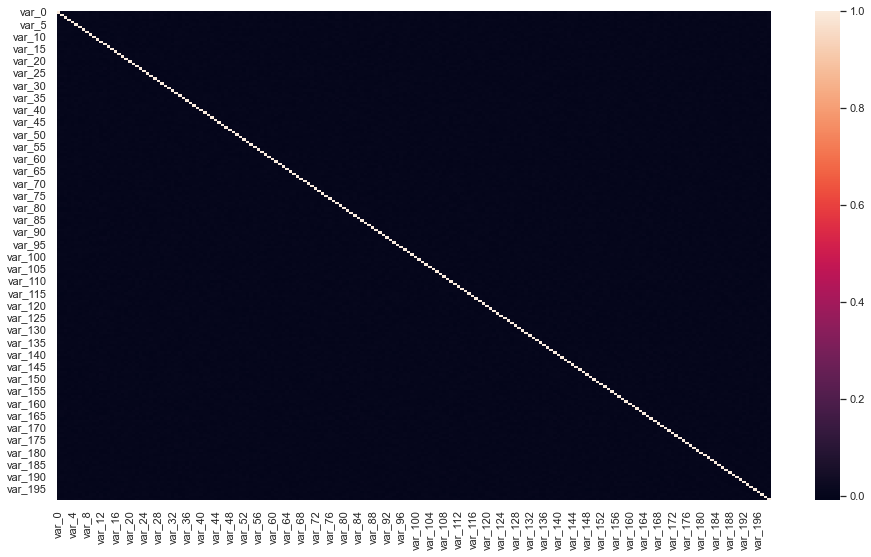

In [11]:
plt.figure(figsize=[16,9])
sns.heatmap(train_df[features].corr())

### Logistic Regression

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [13]:
model1 = LogisticRegression(random_state=0,solver='lbfgs',max_iter=2500,tol=0.01)
model1.fit(X_train, y_train)

LogisticRegression(max_iter=2500, random_state=0, tol=0.01)

In [14]:
y_pred = model1.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[44370   615]
 [ 3718  1297]]


In [15]:
model1.score(X_train,y_train)

0.91492

In [16]:
##NOTE: NEED TO CHANGE THE FORMULA FOR ACCURACY SCORE
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(model1.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.9133


AUC: 0.622


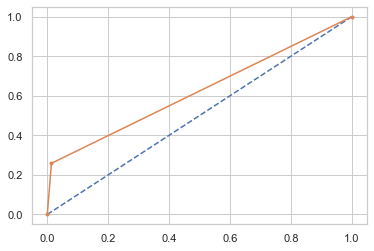

In [17]:
# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [18]:
x_test = test_df.drop(columns = ['ID_code'])
y_pred = model1.predict(x_test)
y_df = pd.DataFrame(y_pred)
df_submission = pd.merge(pd.DataFrame(test_df['ID_code']),y_df,left_index=True,right_index=True)
print(df_submission)

            ID_code  0
0            test_0  0
1            test_1  0
2            test_2  0
3            test_3  0
4            test_4  0
...             ... ..
199995  test_199995  0
199996  test_199996  0
199997  test_199997  0
199998  test_199998  0
199999  test_199999  0

[200000 rows x 2 columns]


### Linear SVC

In [19]:
X=train_df.iloc[:,1:]
y=train_df.iloc[:,0]
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X)

In [20]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X)

In [ ]:
Y_train=y
linear_svc = LinearSVC(random_state=False)
linear_svc.fit(X_train, Y_train)
Y_pred5 = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc
print('Best Score is :',acc_linear_svc)
VDedict=linear_svc.predict(X_train)
cm = confusion_matrix(y, VDedict)
print('confusion matrix = \n',cm)

In [ ]:
Y_test=y
linear_svc = LinearSVC(random_state=False)
linear_svc.fit(X_train, Y_train)
Y_pred5 = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_test, Y_test) * 100, 2)
acc_linear_svc
print('Best Score is :',acc_linear_svc)
VDedict=linear_svc.predict(X_test)

In [ ]:
auc = roc_auc_score(Y_test, Y_pred5)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred5)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### LightGBM: Done in a separate notebook, due to computational issues (submitted separately)
-Ayush Shinde